In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
maxAll = df.max()
minAll = df.min()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY, maxAll, " ", minAll, sep = '\n')

2.3134926739926738
2.4922985347985356
4.6584212454212475
1.741797285664983
0.8110039291512505
1.6652150617992907
MLOGP                             9.148
RDCHI                             6.439
quantitative response of LC50    10.047
dtype: float64
 
MLOGP                           -6.446
RDCHI                            1.000
quantitative response of LC50    0.122
dtype: float64


In [4]:
df1 = df.copy()
df1

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [5]:
df['MLOGP'] = (df['MLOGP'] - df['MLOGP'].min())/(df['MLOGP'].max() - df['MLOGP'].min())
df['RDCHI'] = (df['RDCHI'] - df['RDCHI'].min())/(df['RDCHI'].max() - df['RDCHI'].min())
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [6]:
print(df.max(), df.min(), sep = '\n')
df

MLOGP                             1.000
RDCHI                             1.000
quantitative response of LC50    10.047
dtype: float64
MLOGP                            0.000
RDCHI                            0.000
quantitative response of LC50    0.122
dtype: float64


,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [7]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [8]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
521,0.625625,0.416805,4.535
306,0.321406,0.041368,3.884
191,0.622355,0.179261,4.530
394,0.408170,0.141202,3.758
516,0.588367,0.179261,5.437
...,...,...,...
427,0.545851,0.236073,3.711
545,0.557971,0.147086,2.480
424,0.653392,0.366795,4.737
146,0.403937,0.249127,5.900


In [9]:
test

,MLOGP,RDCHI,quantitative response of LC50
465,0.579454,0.284243,3.601
12,0.613569,0.500644,7.371
98,0.543607,0.308696,6.447
431,0.661921,0.296746,5.597
230,0.580351,0.079059,3.842
...,...,...,...
418,0.596704,0.296746,4.700
17,0.707003,0.528590,7.693
182,0.493267,0.192315,3.480
47,0.393036,0.028498,0.550


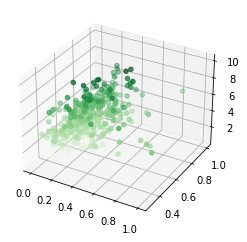

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [11]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
521,0.416805,0.625625
306,0.041368,0.321406
191,0.179261,0.622355
394,0.141202,0.408170
516,0.179261,0.588367
...,...,...
427,0.236073,0.545851
545,0.147086,0.557971
424,0.366795,0.653392
146,0.249127,0.403937


In [12]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
521,4.535
306,3.884
191,4.530
394,3.758
516,5.437
...,...
427,3.711
545,2.480
424,4.737
146,5.900


In [13]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
0.4168045596617025


In [14]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
465,0.284243,0.579454
12,0.500644,0.613569
98,0.308696,0.543607
431,0.296746,0.661921
230,0.079059,0.580351
...,...,...
418,0.296746,0.596704
17,0.528590,0.707003
182,0.192315,0.493267
47,0.028498,0.393036


In [15]:
testY

,quantitative response of LC50
465,3.601
12,7.371
98,6.447
431,5.597
230,3.842
...,...
418,4.700
17,7.693
182,3.480
47,0.550


In [16]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()
testXVal1 = testXVal[:,0]**2 ##-----------------------------------------------------------------------------------------x1^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,0]*testXVal[:,1] #-------------------------------------------------------------------------------x1x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**2 ##-----------------------------------------------------------------------------------------x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**3 ##-----------------------------------------------------------------------------------------x1^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]) ##-----------------------------------------------------------------------x1^2x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**2) ##-----------------------------------------------------------------------x1x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**3 #------------------------------------------------------------------------------------------x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**4 #------------------------------------------------------------------------------------------x1^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]) #------------------------------------------------------------------------x1^3x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^2x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**3) #------------------------------------------------------------------------x1x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**4 #------------------------------------------------------------------------------------------x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**5 #------------------------------------------------------------------------------------------x1^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]) #------------------------------------------------------------------------x1^4x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^3x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^2x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**4) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**5 #------------------------------------------------------------------------------------------x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**6 #------------------------------------------------------------------------------------------x1^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]) #------------------------------------------------------------------------x1^5x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^4x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^3x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^2x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**5) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**6 #------------------------------------------------------------------------------------------x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**7 #------------------------------------------------------------------------------------------x1^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]) #------------------------------------------------------------------------x1^6x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^5x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^4x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^3x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^2x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**6) #------------------------------------------------------------------------x1x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**7 #------------------------------------------------------------------------------------------x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)


testXVal1 = testXVal[:,0]**8 #------------------------------------------------------------------------------------------x1^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]) #------------------------------------------------------------------------x1^7x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^6x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^5x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^4x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^3x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^2x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**7) #------------------------------------------------------------------------x1x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**8 #------------------------------------------------------------------------------------------x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**9 #------------------------------------------------------------------------------------------x1^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**8)*(testXVal[:,1]) #------------------------------------------------------------------------x1^8x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^7x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^6x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^5x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^4x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**7) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**8) #------------------------------------------------------------------------x1x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**9 #------------------------------------------------------------------------------------------x2^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((110,1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# testXVal is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(testXVal[0,1])


(110, 1)
(110, 55)
0.28424342710056993


In [17]:
iters = 10000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [18]:
TrainErr = np.array([])
TestErr = np.array([])

w0 = 4.713435779816513


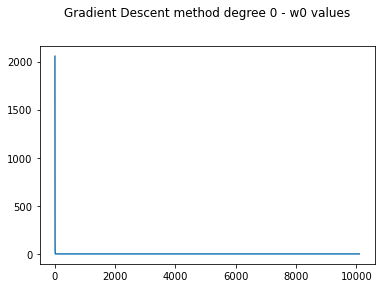

In [19]:
# Degree 0 manipulation for other degrees w = np.zeros((wSize, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.sum(valY-w))
    #print(w1,w)

    counter+=1
    costArr[counter] = (np.sum(valY-w))
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 0 - w0 values", y = 1, pad = 30)
plt.show() 

In [20]:
#training data error for degree 0
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,0]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.4283296000021024

In [21]:
# testing data error for degree 0
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (w - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.2154639407401808

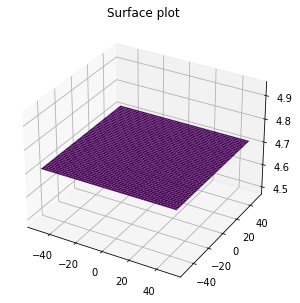

In [22]:
degree = 0
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
k=0
z = w*(x**k)*(y**k)
        

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [23]:
degree = 1

In [24]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.020517065390557
w1=1.4342451491081654
w2=2.366114097985724


436

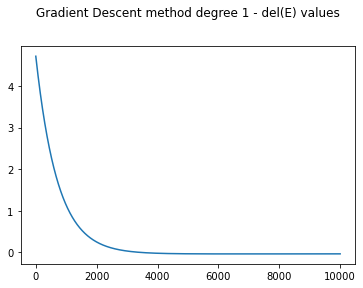

In [25]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [26]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.1328070777252532

In [27]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.9181218867367752

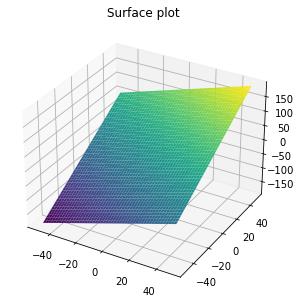

In [28]:
x = np.arange(-50,50,0.1)
y = x[::-1].copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [29]:
degree = 2

In [30]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.668564151984929
w1=1.1494858375011006
w2=1.9860591729548838
w3=0.4132891448219964
w4=0.7878210039066742
w5=1.4411399128118312


436

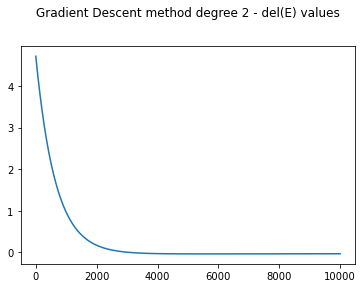

In [31]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [32]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0452370025725828

In [33]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.8144024924775494

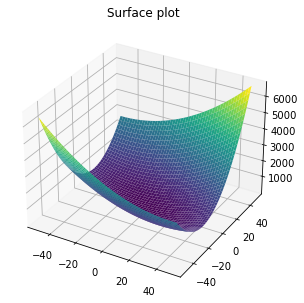

In [34]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [35]:
degree = 3

In [36]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5903792276122317
w1=1.045062103489503
w2=1.8485523989422
w3=0.34891604491540457
w4=0.6951702424951348
w5=1.302799008903555
w6=0.09690699801275034
w7=0.23195781563927495
w8=0.4660070828531196
w9=0.9125958864617169


436

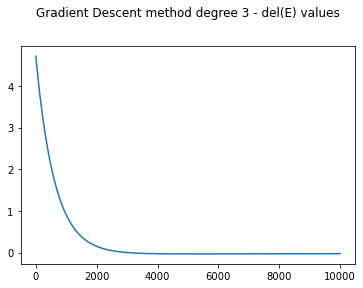

In [37]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [38]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0196754102047139

In [39]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7795392908365576

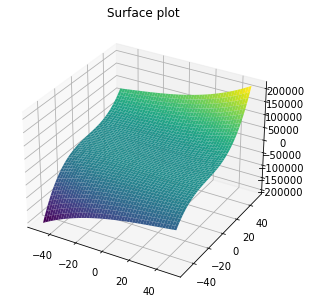

In [40]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [41]:
degree = 4

In [42]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.577758313622887
w1=1.0053713623351899
w2=1.7948384479004564
w3=0.3224633077555971
w4=0.6546626215255407
w5=1.2411970091813407
w6=0.08015987218783903
w7=0.20762736659069436
w8=0.4293712904162851
w9=0.8549530183468429
w10=-0.005266509359179514
w11=0.050580361170883444
w12=0.13111484827654493
w13=0.28105315265478387
w14=0.5869874908873737


436

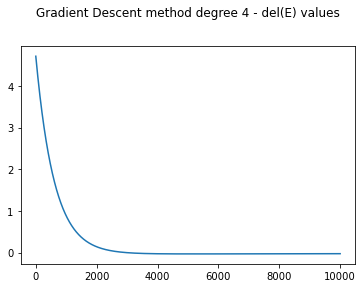

In [43]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [44]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0123421438817595

In [45]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7680752380069537

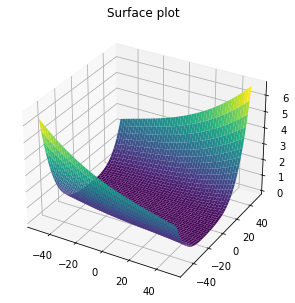

In [46]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [47]:
degree = 5

In [48]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.579973852834626
w1=0.9903862754786072
w2=1.7731583373397728
w3=0.3116500526813891
w4=0.636575149125627
w5=1.2129786457590657
w6=0.07310620509715168
w7=0.19617387680465448
w8=0.41162686878547966
w9=0.8269238258191278
w10=-0.009970986650248773
w11=0.04308610190362029
w12=0.12016317931496491
w13=0.2647687580031256
w14=0.5614278327373093
w15=-0.03804372045374404
w16=-0.00982696450005311
w17=0.020334284530673558
w18=0.06910683068648688
w19=0.166975306842359
w20=0.3784125656962643


436

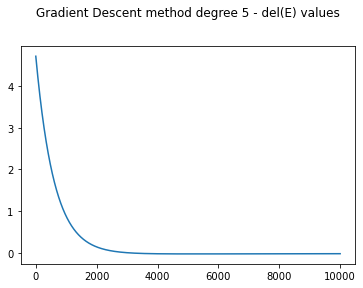

In [49]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [50]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0104920856085724

In [51]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7646749849883859

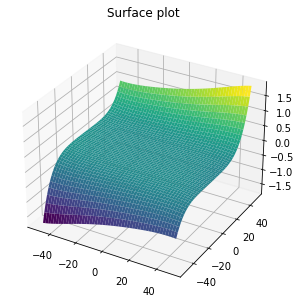

In [52]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [53]:
degree = 6

In [54]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5842058562428165
w1=0.9851810927439888
w2=1.7644323473810988
w3=0.30753601349017484
w4=0.6285753398407812
w5=1.199995203912847
w6=0.07037695754537164
w7=0.19084551268088615
w8=0.4030398569692943
w9=0.8132706376190527
w10=-0.011755639334099514
w11=0.03946417547172197
w12=0.1145952121750435
w13=0.256443240321588
w14=0.5484692900619694
w15=-0.03920256137322487
w16=-0.012406656494526313
w17=0.016462425038578497
w18=0.06366551570728846
w19=0.15918096249207908
w20=0.36655965634971144
w21=-0.04653611589724988
w22=-0.029090583484335113
w23=-0.01620501226407154
w24=-0.00033604666125535733
w25=0.029130778541875867
w26=0.09357487567112889
w27=0.2408153404457538


436

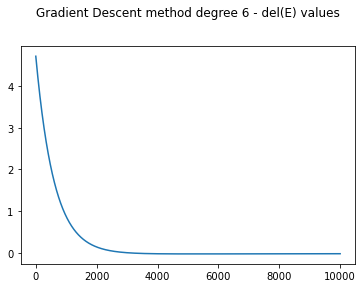

In [55]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [56]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0100928093749146

In [57]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7639945538409985

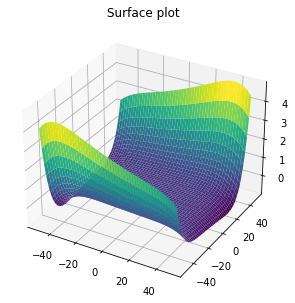

In [58]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [59]:
degree = 7

In [60]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5875253536408875
w1=0.9838816504435166
w2=1.7610856649266
w3=0.306358662918675
w4=0.625257209359754
w5=1.1941709053339746
w6=0.06963810033652917
w7=0.1885442741957117
w8=0.39904241129953844
w9=0.8067871402932977
w10=-0.012155903216559894
w11=0.03785779320840786
w12=0.11189313302373531
w13=0.25233159807653466
w14=0.5420784120917793
w15=-0.03936016079553914
w16=-0.013563585206975131
w17=0.014518502721112
w18=0.060866103007469446
w19=0.15517650700047314
w20=0.36053514973856843
w21=-0.04651517893459801
w22=-0.029938144935148424
w23=-0.017671709135933175
w24=-0.0023932944275304605
w25=0.026354467012863037
w26=0.08974815476070037
w27=0.2352214770541064
w28=-0.04609410843990618
w29=-0.03346301824072172
w30=-0.02692349140674588
w31=-0.02204320290817133
w32=-0.014525544419220292
w33=0.0027292890508747586
w34=0.045045202601532955
w35=0.14799024254778148


436

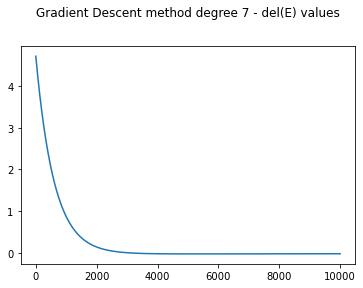

In [61]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [62]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.0098199707169457

In [63]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7641244731970976

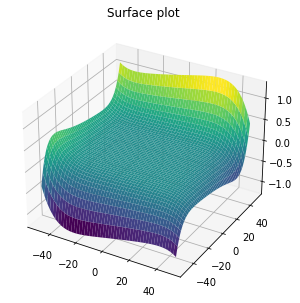

In [64]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [65]:
degree = 8

In [66]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.589584490942537
w1=0.9840931193447416
w2=1.7599692956046888
w3=0.3064707717501578
w4=0.6241509269893942
w5=1.1917647296663647
w6=0.06982877938843075
w7=0.18778353606248172
w8=0.39740422179748813
w9=0.8039456528426938
w10=-0.01188640861055415
w11=0.0373386648561817
w12=0.11076690537294263
w13=0.25051130645321623
w14=0.5391779789855253
w15=-0.03902673464228333
w16=-0.013919744409033845
w17=0.013694821084016123
w18=0.059597808059028784
w19=0.15332603688974383
w20=0.3577297912890316
w21=-0.04613040237386903
w22=-0.030176285373400034
w23=-0.01829850677800791
w24=-0.003344474926470397
w25=0.025041697760389902
w26=0.08792922432879981
w27=0.23256280574513358
w28=-0.04566793305812916
w29=-0.0336105991061984
w30=-0.027408717625560845
w31=-0.02278674485427809
w32=-0.015526564499087434
w33=0.0014133571040463341
w34=0.043278696552585406
w35=0.1454841888860381
w36=-0.04243049864865697
w37=-0.03229195701839515
w38=-0.02825324607659977
w39=-0.02709745355253363
w40=-0.026614631663629956
w41=-0.024

436

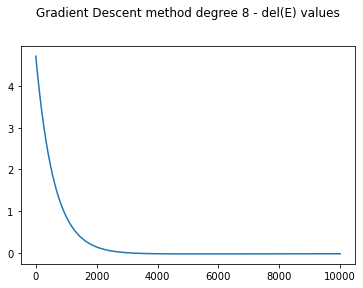

In [67]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [68]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.009284893939101

In [69]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

0.7643951380849581

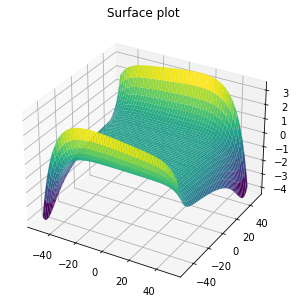

In [70]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [71]:
degree = 9

In [72]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5906255891480634
w1=0.9848253010389825
w2=1.759741981073445
w3=0.30713118888925384
w4=0.624093758148501
w5=1.190996151089558
w6=0.07044905443465885
w7=0.18782262077328535
w8=0.3970010072462054
w9=0.80297432808548
w10=-0.011294506225446093
w11=0.03742147028529827
w12=0.11052955725648496
w13=0.24996348370280563
w14=0.5381587357659854
w15=-0.03845471231696095
w16=-0.013813291956023885
w17=0.01353892218484305
w18=0.059238032736589195
w19=0.1527253054133889
w20=0.3567300300756981
w21=-0.045572315159518484
w22=-0.030053343603009073
w23=-0.01840576168671943
w24=-0.0036076804479939894
w25=0.024629195872169208
w26=0.08731673337853534
w27=0.23160840609597022
w28=-0.04511999302907836
w29=-0.033474325002107674
w30=-0.027481387647285374
w31=-0.022989754360421024
w32=-0.01583825786122803
w33=0.0009799191213567676
w34=0.0426720639954982
w35=0.14458166314700016
w36=-0.0418904285392105
w37=-0.032144446716382565
w38=-0.028298815889259928
w39=-0.02725694568555005
w40=-0.02686125610493408
w41=-0.0245

436

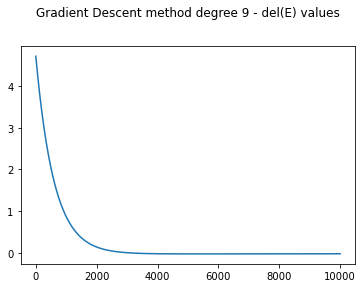

In [73]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [74]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.0168705088668695

In [75]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.5291905799307208

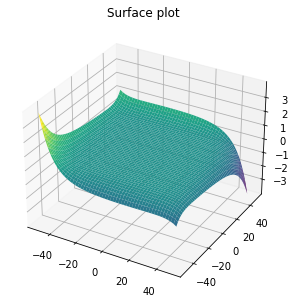

In [76]:
x = np.arange(-50,50,0.1)
y = x.copy() # transpose
x,y = np.meshgrid(x,y)
z = 0
counter = 0
for i in range(degree+1):
    for j in range(i+1):
        k = i-j
        z += w[counter]*(x**k)*(y**j)
        counter += 1

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [77]:
TrainErr

array([1.4283296 , 1.13280708, 1.045237  , 1.01967541, 1.01234214,
       1.01049209, 1.01009281, 1.00981997, 1.00928489, 1.00843525])

In [78]:
TestErr

array([1.21546394, 0.91812189, 0.81440249, 0.77953929, 0.76807524,
       0.76467498, 0.76399455, 0.76412447, 0.76439514, 0.76459529])

In [79]:
Errors = pd.DataFrame()
Errors['Training-Gradient Descent'] = TrainErr.copy()
Errors['Test-Gradient Descent'] = TestErr.copy()

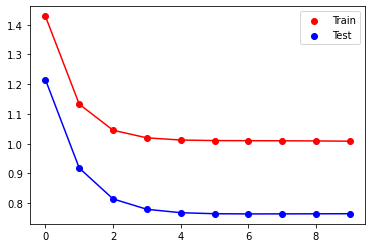

In [80]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
plt.plot(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.plot(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

In [81]:
iters = 300000
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [82]:
TrainErr = np.array([])
TestErr = np.array([])

In [83]:
k = np.random.randint(low = 0, high = np.shape(valX)[0])
k

42

In [84]:
degree = 0

In [85]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=6.0577704003214965


436

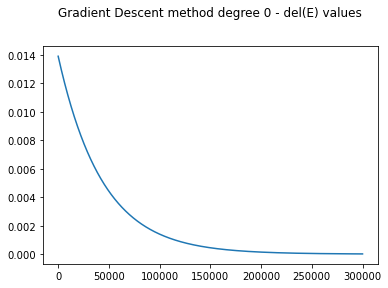

In [86]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [87]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

4.663894771892482

In [88]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

4.972364126047052

In [89]:
degree = 1

In [90]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.7018671191072525
w1=2.502622797749121
w2=1.575085823731984


436

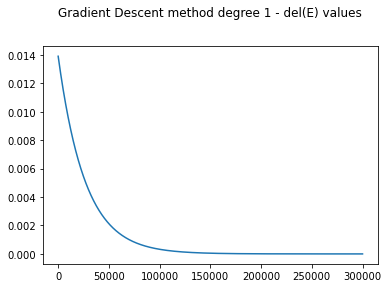

In [91]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [92]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.589820830566447

In [93]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

2.446187400857864

In [94]:
degree = 2

In [95]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=3.0899848077541696
w1=2.0889638054994784
w2=1.314739592115538
w3=1.4122301733446903
w4=0.8888210112536546
w5=0.5594008717254162


436

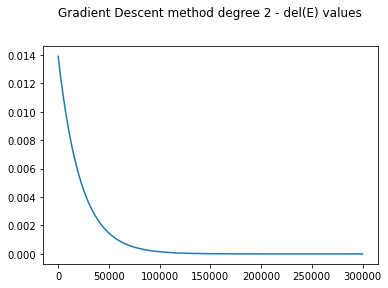

In [96]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [97]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.235463052141143

In [98]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.8240206939387555

In [99]:
degree = 3

In [100]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.864890010163412
w1=1.9367899553907333
w2=1.2189653211127935
w3=1.3093540477977528
w4=0.8240734483787507
w5=0.5186504364232025
w6=0.8851801496143302
w7=0.5571094079221359
w8=0.35063019943523144
w9=0.22067754557316785


436

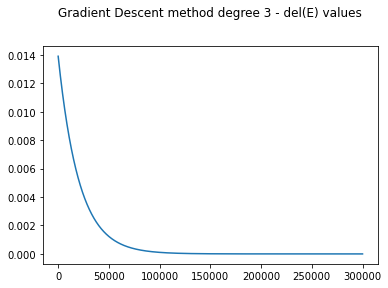

In [101]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [102]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.244540546318901

In [103]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6834143200849958

In [104]:
degree = 4

In [105]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.771219805989633
w1=1.8734648329883963
w2=1.1791101329191265
w3=1.2665435173558666
w4=0.7971296118300437
w5=0.5016926851300912
w6=0.8562383734725808
w7=0.5388942053133369
w8=0.33916602375865407
w9=0.21346229099898897
w10=0.5788542929322553
w11=0.36431586558871787
w12=0.2292909485862383
w13=0.1443097709143681
w14=0.09082482370002451


436

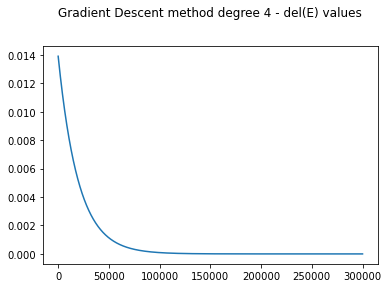

In [106]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [107]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.3044197095065986

In [108]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6582358761640263

In [109]:
degree = 5

In [110]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.730179590350505
w1=1.8457198664678802
w2=1.1616481712181184
w3=1.2477867161246445
w4=0.7853245680399273
w5=0.49426289701372866
w6=0.84355796197655
w7=0.5309134834864137
w8=0.33414316461106475
w9=0.21030103383904758
w10=0.5702817845537306
w11=0.35892055134761286
w12=0.2258952778589515
w13=0.14217262390626983
w14=0.0894797588509732
w15=0.38553523107264753
w16=0.24264586639181804
w17=0.15271500950309702
w18=0.09611486267757785
w19=0.06049219953944189
w20=0.03807222008312061


436

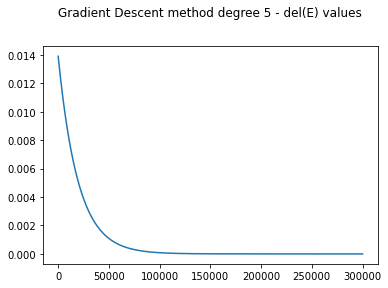

In [111]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [112]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.352764687129526

In [113]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6572609971160337

In [114]:
degree = 6

In [115]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.7117820973509295
w1=1.8332823629269375
w2=1.1538203293526041
w3=1.2393784240636845
w4=0.7800326072861758
w5=0.4909322742884507
w6=0.8378735917047735
w7=0.5273358883969674
w8=0.33189151913196946
w9=0.20888390662459014
w10=0.5664389036033226
w11=0.3565019418341081
w12=0.22437306781544514
w13=0.1412145844196884
w14=0.08887679366770161
w15=0.38293727680627876
w16=0.24101078141643847
w17=0.15168592946449042
w18=0.09546718641499634
w19=0.06008456891269599
w20=0.037815667948263715
w21=0.258882214895516
w22=0.1629337457746361
w23=0.10254627002039399
w24=0.06453996036917184
w25=0.04061977567420169
w26=0.02556503236730345
w27=0.016089967733533706


436

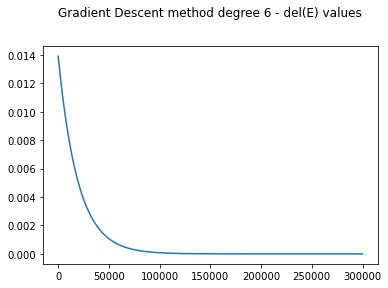

In [116]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [117]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.3841563801200274

In [118]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6596472886604594

In [119]:
degree = 7

In [120]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.7034484238987164
w1=1.8276484380723468
w2=1.1502744832991743
w3=1.2355696464041355
w4=0.777635461498659
w5=0.48942357295692984
w6=0.8352986927427964
w7=0.5257153138317
w8=0.3308715715687878
w9=0.20824197810499745
w10=0.5646981601792794
w11=0.3554063631107034
w12=0.22368353900687926
w13=0.14078061288694685
w14=0.08860366325038856
w15=0.3817604587202054
w16=0.24027012266189565
w17=0.1512197780710168
w18=0.09517380282869692
w19=0.05989992089937462
w20=0.0376994552819254
w21=0.2580866348068032
w22=0.1624330283191414
w23=0.10223113145194881
w24=0.06434162033482382
w25=0.04049494560525804
w26=0.02548646756235304
w27=0.01604052108474891
w28=0.17447776359342376
w29=0.10981177516629419
w30=0.06911268070395706
w31=0.04349772715042257
w32=0.02737634031817159
w33=0.017229957938365733
w34=0.010844088256779263
w35=0.006824987648923134


436

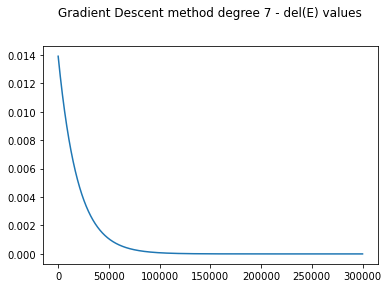

In [121]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [122]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.4032593957815656

In [123]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6615123001697834

In [124]:
degree = 8

In [125]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.699655289671064
w1=1.8250841147493486
w2=1.1486605647665378
w3=1.233836052570926
w4=0.7765443825421182
w5=0.4887368761848117
w6=0.8341267080903046
w7=0.5249776971147497
w8=0.3304073347548303
w9=0.2079497995053289
w10=0.5639058477014285
w11=0.3549077022046308
w12=0.22336969477726504
w13=0.14058308747584652
w14=0.08847934588418185
w15=0.38122482110650224
w16=0.23993300625234595
w17=0.15100760575399852
w18=0.09504026708010227
w19=0.05981587696564398
w20=0.037646560211715585
w21=0.2577245205384424
w22=0.16220512299868767
w23=0.10208769375941246
w24=0.06425134437462235
w25=0.04043812825936127
w26=0.025450708199758896
w27=0.016018015070202875
w28=0.1742329586357421
w29=0.10965770128078206
w30=0.06901571059999247
w31=0.04343669668421816
w32=0.027337929327021202
w33=0.01720578305764061
w34=0.010828873214402752
w35=0.006815411696216407
w36=0.11778904006317982
w37=0.07413336414955683
w38=0.046657614979991845
w39=0.029365091691096336
w40=0.018481626426816885
w41=0.011631855911555128
w42=0.00

436

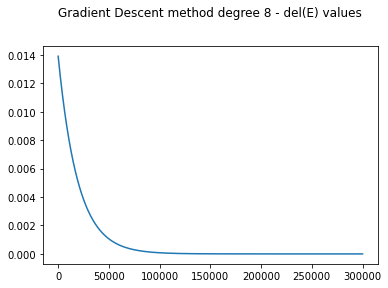

In [126]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [127]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.4146730251729074

In [128]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6625844607184048

In [129]:
degree = 9

In [130]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 = ((valY[k,0]-np.sum(w*valX[k,:wSize]))*valX[k,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.6979249867982933
w1=1.8239143549288126
w2=1.1479243483011334
w3=1.2330452441760353
w4=0.7760466682668155
w5=0.4884236277400259
w6=0.8335920873019448
w7=0.524641220668698
w8=0.3301955652141937
w9=0.20781651725375533
w10=0.5635444208510805
w11=0.35468022952725814
w12=0.22322652937904672
w13=0.14049298289061282
w14=0.08842263639724474
w15=0.38098048087321934
w16=0.23977922485232164
w17=0.15091081973280632
w18=0.09497935247082184
w19=0.059777538891831274
w20=0.03762243122327463
w21=0.25755933593873986
w22=0.16210116009964895
w23=0.10202226220951675
w24=0.06421016345563975
w25=0.04041221005796575
w26=0.0254343959566052
w27=0.01600774856780929
w28=0.17412128667894997
w29=0.10958741785004292
w30=0.06897147603316335
w31=0.043408856596133936
w32=0.027320407498278267
w33=0.017194755273476494
w34=0.010821932613317712
w35=0.00681104346206339
w36=0.11771354497489986
w37=0.07408584950075399
w38=0.046627710493462676
w39=0.02934627058356053
w40=0.018469780910308473
w41=0.011624400650960055
w42=0.

436

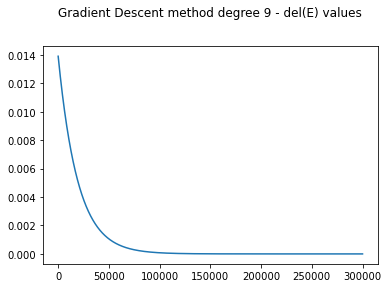

In [131]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [132]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

2.4214914595413037

In [133]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

1.6631401401871564

In [134]:
TrainErr

array([2.33194739, 1.29491042, 1.11773153, 1.12227027, 1.15220985,
       1.17638234, 1.19207819, 1.2016297 , 1.20733651, 1.21074573])

In [135]:
TestErr

array([2.48618206, 1.2230937 , 0.91201035, 0.84170716, 0.82911794,
       0.8286305 , 0.82982364, 0.83075615, 0.83129223, 0.83157007])

In [136]:
Errors['Training-Stochastic Gradient Descent'] = TrainErr.copy()
Errors['Test-Stochatic Gradient Descent'] = TestErr.copy()

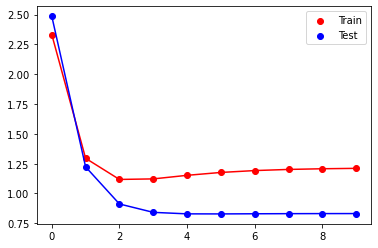

In [137]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
plt.plot(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.plot(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

In [138]:
Errors

,Training-Gradient Descent,Test-Gradient Descent,Training-Stochastic Gradient Descent,Test-Stochatic Gradient Descent
0,1.428330,1.215464,2.331947,2.486182
1,1.132807,0.918122,1.294910,1.223094
2,1.045237,0.814402,1.117732,0.912010
3,1.019675,0.779539,1.122270,0.841707
4,1.012342,0.768075,1.152210,0.829118
5,1.010492,0.764675,1.176382,0.828630
6,1.010093,0.763995,1.192078,0.829824
7,1.009820,0.764124,1.201630,0.830756
8,1.009285,0.764395,1.207337,0.831292
9,1.008435,0.764595,1.210746,0.831570
